In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
from scipy import signal
from scipy.ndimage.filters import gaussian_filter1d
%matplotlib inline

np.random.seed(0)

from math import pi

# generate a 2-D OU process where time-varying parameters are specified as an array
def generateOU(N,dt,mean_p,revert,sigma, X_init=None):
    #This method returns a 2-D OU process using the Euler-Maruyama method
    x = np.zeros((N,2))

    expth = np.exp(-dt*revert)
    stddev = np.sqrt(np.exp(2*dt*revert)-1.0)
    fact = sigma*np.sqrt(1.0-np.exp(-2*dt*revert))/np.sqrt(2*revert)
    for i in range(N-1):

        x[i+1,0]=(x[i,0]*expth[i,0])+(mean_p[i,0]*(1.0-expth[i,0])) + fact[i,0]*np.random.normal(0,1) # revert[i,0]*(mean_p[i,0]-x[i,0])*dt#+math.sqrt(dt)*sigma[i]@np.random.normal(0,1,size=2)
        x[i+1,1]=(x[i,1]*expth[i,1])+(mean_p[i,1]*(1.0-expth[i,1])) + fact[i,1]*np.random.normal(0,1) # revert[i,0]*(mean_p[i,0]-x[i,0])*dt#+math.sqrt(dt)*sigma[i]@np.random.normal(0,1,size=2)

    return x

# Single individual with daily activity pattern

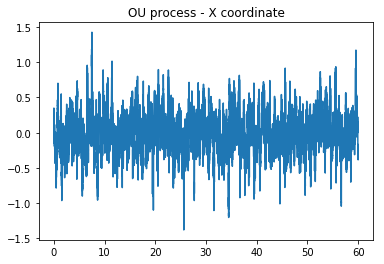

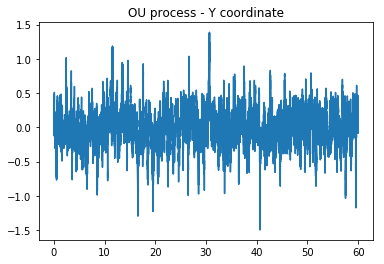

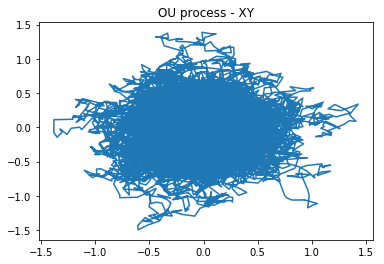

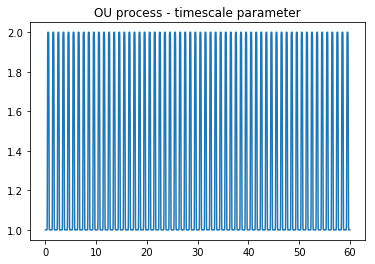

In [2]:
day_steps=24*30
dt=1.0/day_steps
N=int(60*day_steps) # run for 60 days

sigma=np.zeros((N,2))
sigma[:,1]=1
sigma[:,0]=1

revert= 12*np.ones((N,2))
T = np.arange(N)/day_steps
b=5
window_len=50
w=np.ones(window_len,'d')
active = 1-0.5*1.0*(signal.square(2 * np.pi *T,duty=0.4) - signal.square(2 * np.pi *T,duty=0.7))
active2 = 1 + np.sqrt((1+b**2)/(1+np.cos(2 * np.pi *T)**2*b**2)) *np.cos(2 * np.pi *T)# - signal.square(2 * np.pi/365. *T,duty=0.7))

filtwidth=20
active = gaussian_filter1d(active, filtwidth)

#active = np.ones_like(active)
#smoothed=np.convolve(w/w.sum(),active,mode='valid')
#active[window_len//2-1:-window_len//2]=smoothed
sigma[:,0]=active
sigma[:,1]=active

mean_p = np.zeros((N,2))
X=generateOU(N,dt,mean_p,revert,sigma)

plt.plot(T,X[::1,0])
plt.title('OU process - X coordinate')
plt.show()

plt.plot(T,X[::1,1])
plt.title('OU process - Y coordinate')
plt.show()

plt.plot(X[::1,0],X[::1,1])
plt.title('OU process - XY')
plt.show()

plt.plot(T,active)
plt.title('OU process - timescale parameter')
plt.show()
dataset = pd.DataFrame({'Animal':np.zeros_like(T),
                        'Date':pd.to_datetime(T, unit='D', origin=pd.Timestamp('2018-01-01')),
                        'Time':pd.to_datetime(pd.to_datetime(T, unit='D', origin=pd.Timestamp('2018-01-01')), format='%H:%M').time,
                        'Latitude':X[::,0],
                        'Longitude':X[::,1],'Lengthscale':revert[::,1]**-1,'Noise':active**2/(2*revert[:,0])})

dataset.to_csv('../data/periodic.csv')


In [3]:
sigma[window_len//2-1:-window_len//2,0].shape

(2111,)

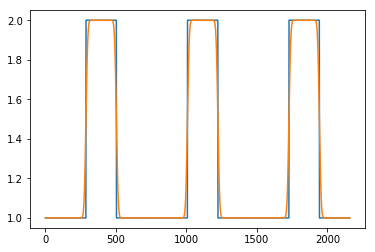

In [27]:
plt.plot(active)
plt.plot(active2)